In [394]:
import numpy as np
import matplotlib.pyplot as plt

In [395]:
N = 50; m = 3
iterations = 100

X_base = np.random.uniform(size = (N, m))
X_base_blind = np.ones((N, m))
c = np.zeros((iterations + 1, m))
c0 = np.array([1, 2, 3])
e = np.zeros((iterations, N, m))
c[0] = np.array([1, 1, 1])

payoff = np.zeros((iterations, N))

def dilute(e):
    return np.sum(e ** (1) + 1)

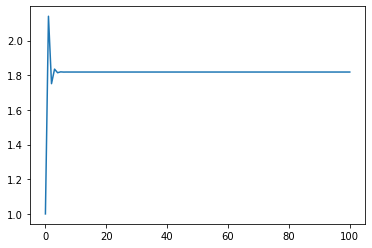

In [396]:
for t in range(iterations):
    for i in range(N):
        e[t, i] = c[t] * X_base[i] / np.linalg.norm(c[t] * X_base[i])
        # payoff[t, i] = 0
        
    for i in range(N):
        for j in range(m):
            payoff[t, i] += c0[j] * e[t, i, j] * X_base[i, j] / dilute(e[t].transpose()[j])

    for j in range(m):
        c[t + 1, j] = c0[j] / dilute(e[t].transpose()[j])

lambs = c.transpose()[1] / c.transpose()[0]
plt.plot(lambs[:])

# some = []
# for t in range(iterations):
#     some.append(e[t, 0, 1])
# some

# print(e[0])
# print(np.sum(e[0], 0))

array([[0.02159468, 0.03927361, 0.03106444, ..., 0.02971317, 0.01258211,
        0.00674562],
       [0.02114746, 0.03950596, 0.03216821, ..., 0.03026779, 0.01498744,
        0.00790425],
       [0.02114066, 0.04037827, 0.03279898, ..., 0.030994  , 0.01452981,
        0.0078752 ],
       ...,
       [0.02114307, 0.04022957, 0.03270347, ..., 0.03087088, 0.01463965,
        0.00790129],
       [0.02114307, 0.04022957, 0.03270347, ..., 0.03087088, 0.01463965,
        0.00790129],
       [0.02114307, 0.04022957, 0.03270347, ..., 0.03087088, 0.01463965,
        0.00790129]])

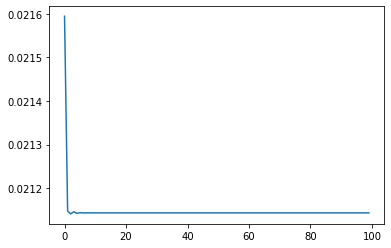

In [397]:
np.linalg.norm(e[-1, 9])

# expected_payoff = np.array(payoff.shape)
# for t in range(iterations):
#     for i in range(N):
#         for j in range(m):
#             expected_payoff[t, i] += c0[j] * e[t, i, j] * X_base[i, j] / sum(e[t].transpose()[j])

plt.plot(payoff.transpose()[0]) # 1st agent's payoff
payoff

In [398]:
c_blind = np.zeros((iterations + 1, m))
e_blind = np.zeros((iterations, N, m))
c_blind[0] = np.ones(m)

payoff_blind = np.zeros((iterations, N))

for t in range(iterations):
    for i in range(N):
        e_blind[t, i] = c_blind[t] * X_base_blind[i] / np.linalg.norm(c[t] * X_base_blind[i])
        # payoff_blind[t, i] = 0
        
    for i in range(N):
        for j in range(m):
            payoff_blind[t, i] += c0[j] * e_blind[t, i, j] * X_base[i, j] / dilute(e_blind[t].transpose()[j])

    for j in range(m):
        c_blind[t + 1, j] = c0[j] * X_base_blind[i, j] / dilute(e_blind[t].transpose()[j]) # 注意这里有区别

lambs_blind = c_blind.transpose()[1] / c_blind.transpose()[0]
#plt.plot(lambs_blind[0:50])

# plt.plot(payoff_blind.transpose()[0]) # 1st agent's payoff

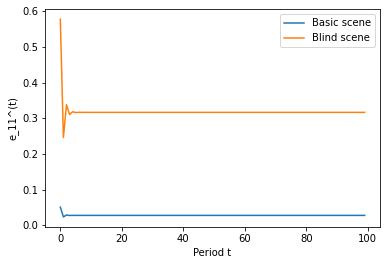

In [399]:
plt.plot(e[:, 0, 0], label = "Basic scene")
plt.plot(e_blind[:, 0, 0], label = "Blind scene")
plt.xlabel("Period t")
plt.ylabel("e_11^(t)")

plt.legend()
plt.show()

In [400]:
# Solving for social optimum

def ind_utility(i, e_opt):
    uind = 0
    for j in range(m):
        uind += c0[j] * e_opt[i, j] * X_base[i, j] / dilute(e_opt.transpose()[j])
    return uind

def gen_vector(N = N, m = m):
    vec = np.random.uniform(0, 1, (N, m))
    for i in range(N):
        vec[i] = vec[i] / np.linalg.norm(vec[i])
    return vec

print(np.linalg.norm(gen_vector()[1]))


# rep = 5000
# ind_u_opt = np.zeros((rep, N))

# for k in range(rep):
#     gen_v = gen_vector()
#     for i in range(N):
#         ind_u_opt[k, i] = ind_utility(i, gen_v)

# sum_u_opt = np.sum(ind_u_opt, 1)



1.0


In [401]:
# plt.hist(sum_u_opt, bins = 100)
# np.max(sum_u_opt)

$3.206591116690906$


In [402]:
# Solve under the ground truth
e_truth = c0 * X_base
for i in range(N):
    e_truth[i] /= np.linalg.norm(e_truth[i])

ind_u_truth = np.array([ind_utility(i, e_truth) for i in range(N)])
sum_u_truth = np.sum(ind_u_truth)

True

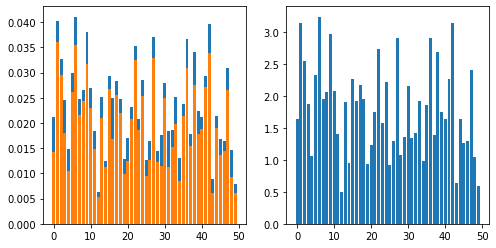

In [403]:
# Individual payoff comparison

fig = plt.figure(figsize = (8,4))

ax1 = fig.add_subplot(1,2,1)
# ax1.bar(range(N), ind_u_opt[np.argmax(sum_u_opt)])
# ax1.bar(range(N), ind_u_truth)
ax1.bar(range(N), payoff[-1])
ax1.bar(range(N), payoff_blind[-1])

ax2 = fig.add_subplot(1,2,2)
ax2.bar(range(N), np.sqrt(np.sum(X_base**2 * c0**2, 1))) # character * c !

np.all(payoff[-1] >= payoff_blind[-1])

1.171824952293278 0.9799301354797973 1.1678267531030426


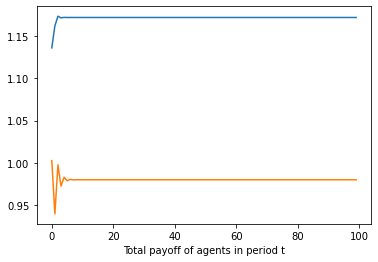

In [404]:
# Total payoff comparison

plt.plot(np.sum(payoff, 1))
plt.plot(np.sum(payoff_blind, 1))


# plt.plot([3]*iterations, color = "white")
# plt.plot([3.3]*iterations, color = "white")
plt.xlabel("Total payoff of agents in period t")
print(np.sum(payoff[-1]), np.sum(payoff_blind[-1]), sum_u_truth)


In [405]:
# Examination of convergency
sum(e[-1, :, 1])

27.13411068539689